In [259]:
import os
import os.path as osp
import pandas as pd
import numpy as np
from snorkel import SnorkelSession
from tcre.env import *
from tcre.supervision import *
from tcre.modeling import utils
from tcre.modeling import features
%matplotlib inline
session = SnorkelSession()
classes = get_candidate_classes()

In [260]:
from snorkel.models import Candidate, GoldLabel
candidate_class = classes.inducing_cytokine
cands = session.query(candidate_class.subclass)\
    .filter(candidate_class.subclass.split == SPLIT_DEV).all()
len(cands)

673

In [294]:
import imp
imp.reload(features)

<module 'tcre.modeling.features' from '/lab/repos/t-cell-relation-extraction/src/tcre/modeling/features.py'>

In [261]:
w2v_model.ix('*')

1882

In [82]:
# import spacy
# nlp = spacy.load('en_core_sci_md')

In [263]:
pd.set_option('display.max_colwidth', 250)
# markers = {
#     'primary': {'immune_cell_type': ['<<', '>>'], 'cytokine': ['[[', ']]'], 'transcription_factor': ['{{', '}}']},
#     'secondary': {'immune_cell_type': ['<#', '#>'], 'cytokine': ['<%', '%>'], 'transcription_factor': ['<*', '*>']}
# }
# markers = {
#     'primary': {'immune_cell_type': ['<', '>'], 'cytokine': ['[', ']'], 'transcription_factor': ['(', ')']},
#     'secondary': {'immune_cell_type': ['*', '*'], 'cytokine': ['#', '#'], 'transcription_factor': ['%', '%']}
# }
# markers = {
#     'primary': {'immune_cell_type': ['< #', '# >'], 'cytokine': ['< @', '@ >'], 'transcription_factor': ['< *', '* >']},
#     'secondary': {'immune_cell_type': ['| #', '# |'], 'cytokine': ['| @', '@ |'], 'transcription_factor': ['| *', '* |']}
# }
markers = {
    'primary': {'immune_cell_type': ['', ''], 'cytokine': ['', ''], 'transcription_factor': ['', '']},
    'secondary': {'immune_cell_type': ['|#', '#|'], 'cytokine': ['|@', '@|'], 'transcription_factor': ['|*', '*|']}
}
swaps = {
    'immune_cell_type': 'CELL',
    'cytokine': 'CYTOKINE',
    'transcription_factor': 'TF'
}

In [264]:
records = features.candidates_to_records(cands)
df = features.get_record_features(records, markers=markers, swaps=swaps, subtokenizer=lambda t: t.split(), lower=False, assert_unique=False)
df = df.rename(columns={'tokens': 'text'})
df.head()

,id,label,e0_dist,e0_text,e1_dist,e1_text,token_indices,text,word_indices
0,30167,1,"[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30]",IL-12,"[-27, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -9, -8, -7, -6, -5, -4, -3, -2, 0, 2, 3]",TH1,"[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 31]","[CYTOKINE, induces, not, only, |@, Ifng, @|, expression1, but, also, |*, T, -, bet, *|, ,, which, promotes, the, survival, and, proliferation, of, differentiating, CELL, cells, .]","[0, 1, 2, 3, None, 4, None, 5, 6, 7, None, 8, 9, 10, None, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]"
1,30168,0,"[-7, -6, -5, -4, -3, -2, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 21, 23, 24]",Ifng,"[-28, -27, -26, -25, -24, -23, -21, -19, -18, -17, -16, -15, -14, -13, -12, -11, -9, -8, -7, -6, -5, -4, -3, -2, 0, 2, 3]",TH1,"[0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 31]","[|@, IL-12, @|, induces, not, only, CYTOKINE, expression1, but, also, |*, T, -, bet, *|, ,, which, promotes, the, survival, and, proliferation, of, differentiating, CELL, cells, .]","[None, 0, None, 1, 2, 3, 4, 5, 6, 7, None, 8, 9, 10, None, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]"
2,30169,1,"[-4, -3, -2, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 23, 24, 25, 26, 27]",TGFβ,"[-25, -24, -23, -21, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, 0, 2, 3, 4, 5, 6]",Th17,"[0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 31]","[In, mice, ,, CYTOKINE, together, with, |@, IL6, @|, can, activate, antigen, -, responsive, naïve, CD4, +, T, cells, to, develop, into, CELL, cells, [, 39, ], .]","[0, 1, 2, 3, 4, 5, None, 6, None, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]"
3,30170,1,"[-9, -8, -7, -6, -5, -4, -3, -2, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 19, 20, 21, 22]",IL6,"[-25, -24, -23, -22, -21, -20, -19, -18, -16, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, 0, 2, 3, 4, 5, 6]",Th17,"[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 31]","[In, mice, ,, |@, TGFβ, @|, together, with, CYTOKINE, can, activate, antigen, -, responsive, naïve, CD4, +, T, cells, to, develop, into, CELL, cells, [, 39, ], .]","[0, 1, 2, None, 3, None, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]"
4,30171,0,"[-15, -14, -13, -12, -11, -10, -9, -8, -7, -5, -3, -2, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]",IL-12,"[-10, -9, -8, -7, -6, -5, -4, -3, -2, 0, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]",Th1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]","[Several, findings, suggest, that, during, the, initiation, of, a, CELL, response, ,, CYTOKINE, is, produced, particularly, by, macrophages, in, response, to, certain, microbial, antigens, ,, while, NK, cells, are, the, main, source, of, |@, IFN-...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, None, 33, None, 34, 35, 36, None, 37, None, 38, 39, 40, 41, 42, 43]"


In [199]:
from tcre.modeling import data as tcre_data
from torchtext import data as txd
from torchtext.vocab import Vocab
from collections import defaultdict, Counter

DIST_PAD_VAL = features.MAX_POS_DIST + 1
SEQ_LEN = 128
fields = {
    'text': txd.Field(sequential=True, lower=False, fix_length=SEQ_LEN, include_lengths=True),
    'label': txd.Field(sequential=False),
    'e0_dist': txd.Field(sequential=True, use_vocab=False, pad_token=DIST_PAD_VAL, fix_length=SEQ_LEN),
    'e1_dist': txd.Field(sequential=True, use_vocab=False, pad_token=DIST_PAD_VAL, fix_length=SEQ_LEN),
    'id': txd.Field(sequential=False, use_vocab=False)
}
        
ds = tcre_data.DataFrameDataset(df, fields)
for k, f in fields.items():
    if k in ['label', 'text']:
        fields[k].build_vocab(ds)

In [230]:
pd.concat([df['label'].value_counts(), df['label'].value_counts(normalize=True)], axis=1)

,label,label
0,540,0.802377
1,133,0.197623


In [248]:
from gensim.models import KeyedVectors

# Load pretrained model (since intermediate data is not included, the model cannot be refined with additional data)
model = KeyedVectors.load_word2vec_format(W2V_MODEL_01, binary=True, limit=50000)

/opt/conda/envs/nlp/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [249]:
len(model.vocab)

50000

In [258]:
import torch
import numpy as np
from torchtext.vocab import Vocab
from collections import defaultdict, Counter
    
class W2VVocab(Vocab):

    def __init__(self, model):
        super().__init__(Counter())
        specials = ['<pad>']
        self.itos = specials + list(model.vocab.keys())

        # Use zero vector for unk as well as pad
        def get_unk_index():
            return 0
        self.stoi = defaultdict(get_unk_index)
        self.stoi.update({w: i for i, w in enumerate(self.itos)})

        if len(self.itos) != len(self.stoi):
            raise ValueError(
                f'W2V vocab has repeated words (probably due to unicode normalization) '
                f'(len(itos) = {len(itos)}, len(stoi) = {len(stoi)}')
        self.vectors = torch.cat([
            torch.FloatTensor(np.zeros((len(specials), model.vectors.shape[1]))),
            torch.FloatTensor(model.vectors)
        ], dim=0)

        
# class IntegerVocab(Vocab):
    
#     def __init__(self, int_range, specials=['<pad>']):
#         super().__init__(Counter())
#         self.itos = specials + list(range(int_range[0], int_range[1]+1))
#         self.stoi = {w: i for i, w in enumerate(self.itos)}
#         self.vectors = None
        
w2vocab = W2VVocab(model)

In [8]:
fields['text'].vocab = w2vocab

In [201]:
len(fields['text'].vocab), len(w2v_model.vocab)

(1351, 4087446)

In [202]:
# ds = txd.TabularDataset('/tmp/data.csv', fields=[('text', TEXT), ('label', LABEL)], format='csv', skip_header=True)
# LABEL.build_vocab(ds)

In [203]:
ds_train, ds_val = ds.split(stratified=True, strata_field='label')

In [204]:
len(ds_train), len(ds_val)

(471, 202)

In [205]:
pd.Series(list(ds_val.label)).value_counts(), pd.Series(list(ds_train.label)).value_counts()

(0    162
 1     40
 dtype: int64, 0    378
 1     93
 dtype: int64)

In [206]:
# Compare single example to numeric features
# from torchtext.data import Iterator
# ds.examples[0].text
# b = next(iter(Iterator(ds, 3, shuffle=False)))
# b.text[0].t()
#b.e1_dist.t()

In [207]:
from torchtext.data import BucketIterator
train_iter, val_iter = BucketIterator.splits(
    (ds_train, ds_val), 
    batch_sizes=(32, 32),
    sort_key=lambda x: len(x.text), 
    sort=True,
    sort_within_batch=True,
    repeat=False
)
#ds_iter = txd.Iterator(ds, 10, sort_within_batch=True, sort_key=lambda x: len(x.text), device='cuda')

In [208]:
b = next(iter(train_iter))

In [209]:
b.text[0].t().detach().numpy()[0]

array([ 188,  544,    2,    4,   56,    3,    5,   17,  100,   30,  205,
         18,   51,   14,  194,   13,    2,   55, 1051,  905,    8,   16,
         19,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1])

In [210]:
b.e0_dist.t()[0]

tensor([ -8,  -7,  -6,  -5,  -4,  -3,  -2,   0,   2,   3,   4,   5,   6,   7,
          8,   9,  10,  11,  12,  13,  14,  16,  18, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
        128, 128])

In [191]:
b.id

tensor([30819, 30503, 30818, 30301, 30726, 30624, 30623, 30398, 30826, 30828,
        30827, 30400, 30397, 30399, 30214, 30502, 30601, 30670, 30671, 30733,
        30484, 30304, 30728, 30413, 30672, 30695, 30677, 30678, 30482, 30215,
        30646, 30216])

In [192]:
b.fields

dict_keys(['text', 'label', 'e0_dist', 'e1_dist', 'id'])

In [193]:
b.dataset.fields

{'text': <torchtext.data.field.Field at 0x7f1494409ef0>,
 'label': <torchtext.data.field.Field at 0x7f1494409be0>,
 'e0_dist': <torchtext.data.field.Field at 0x7f14944098d0>,
 'e1_dist': <torchtext.data.field.Field at 0x7f1494409ba8>,
 'id': <torchtext.data.field.Field at 0x7f1494409da0>}

### Set Model

In [20]:
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence
import torch.optim as optim

In [219]:
def pos_indices(pos, max_dist, pad_val):
    """Convert position features provided as positive or negative integers to embedding indices
    
    Example: 
        pos = torch.IntTensor([-100, -4, -3, -2, -1, 0, 1, 2, 3, 4, 100, 99, 99])
        pos_indices(pos, 2, 99) -> [1, 1, 1, 2, 3, 4, 5, 6, 7, 7, 7, 0, 0]
    """
    if torch.any(pos > pad_val):
        raise ValueError(f'Position array has value > padding value (max pos = {pos.max().item()}, pad val = {pad_val})')
    offset = max_dist + 2
    pos = pos + offset
    pos = torch.clamp(pos, 1, pad_val+offset)
    pos[pos==(pad_val + offset)] = 0
    pos = torch.clamp(pos, 0, 2*max_dist + 3)
    return pos


class RNN(nn.Module):

    def __init__(self, fields, cardinality=2, hidden_dim=50, wrd_embed_dim=None, pos_embed_dim=10, train_wrd_embed=None, 
                 num_layers=1, cell_type=nn.LSTM, 
                 dropout=0, bidirectional=False, max_dist=50, device=None, names=['text', 'label', 'e0_dist', 'e1_dist']):
        super().__init__()
        self.fields = fields
        self.cardinality = cardinality
        self.hidden_dim = hidden_dim
        self.pos_embed_dim = pos_embed_dim
        self.wrd_embed_dim = wrd_embed_dim
        self.train_wrd_embed = train_wrd_embed 
        if self.train_wrd_embed is None:
            self.train_wrd_embed = wrd_embed_dim is not None
        self.num_layers = num_layers
        self.dropout = dropout
        self.bidirectional = bidirectional
        self.num_directions = 2 if self.bidirectional else 1
        self.cell_type = cell_type
        self.max_dist = max_dist
        self.device = device
        self.names = names
        
        self._init_embedding()
        self._init_cell()
        self.output = nn.Linear(self.hidden_dim * self.num_directions, self.cardinality if self.cardinality > 2 else 1)
        self.dropout = nn.Dropout(p=dropout)
        
    def _init_embedding(self):
        if self.wrd_embed_dim:
            self.wrd_embed_shape = (len(self.fields[self.names[0]].vocab), self.wrd_embed_dim)
            self.wrd_embed = nn.Embedding(*self.wrd_embed_shape, padding_idx=0)
        else:
            vectors = self.fields[self.names[0]].vocab.vectors
            self.wrd_embed_shape = tuple(vectors.shape)
            self.wrd_embed = nn.Embedding.from_pretrained(vectors, padding_idx=0)
        self.wrd_embed.weight.requires_grad = self.train_wrd_embed
        
        # Index values are 0=pad, 1=< -max_dist, 2=-max_dist, 3=-max_dist+1, ..., 2*(max_dist+2) > max_dist 
        self.pos_embed_shape = (2*(self.max_dist+2), self.pos_embed_dim)
        # Define without looping/lists as placement on GPU will fail otherwise
        self.pos_embed_e0 = nn.Embedding(*self.pos_embed_shape, padding_idx=0)
        self.pos_embed_e1 = nn.Embedding(*self.pos_embed_shape, padding_idx=0)
        
        
    def _init_cell(self):
        self.cell = self.cell_type(
            self.wrd_embed_shape[1] + 2*self.pos_embed_dim, self.hidden_dim,
            num_layers=self.num_layers, bidirectional=self.bidirectional,
            dropout=self.dropout, batch_first=True
        )

    def prepare(self, batch, **kwargs):
        """Extract seq token indices, seq lengths, and training labels"""
        text, label, e0_dist, e1_dist = [getattr(batch, n) if n in batch.fields else None for n in self.names]
        X, L = text[0].t(), text[1]
        # Convert relative positions (as pos/neg integers or pad) to embedding indices
        D0, D1 = [pos_indices(v.t(), self.max_dist, DIST_PAD_VAL) for v in [e0_dist, e1_dist]]
        Y = None if label is None else (label - 1).type(torch.FloatTensor).to(self.device)
        features = (X, L, D0, D1)
        return tuple([f.to(self.device) for f in features]), Y
        
        
    def transform(self, Y):
        return torch.sigmoid(Y) if self.cardinality == 2 else torch.softmax(Y)

    def classify(self, Y):
        return torch.round(Y) if self.cardinality == 2 else torch.argmax(Y, dim=0)
    
    def forward(self, features):
        X, L, D0, D1 = features
        H = self.initial_hidden_state(len(X))
        X = self.wrd_embed(X)
        D = torch.cat([self.pos_embed_e0(D0), self.pos_embed_e1(D1)], dim=-1)
        X = torch.cat([X, D], dim=-1)
        L = L.view(-1).tolist()
        X = nn.utils.rnn.pack_padded_sequence(X, L, batch_first=True)    
        ht = self.cell(X, H)[1]
        ht = ht[0] if isinstance(ht, tuple) else ht
        Y = ht[-1] if self.num_directions == 1 else torch.cat((ht[0], ht[1]), dim=1)
        Y = self.output(self.dropout(Y))
        return Y.view(-1) if self.cardinality == 2 else Y

    def initial_hidden_state(self, batch_size):
        def get_h0():
            return torch.zeros(self.num_layers * self.num_directions, batch_size, self.hidden_dim).to(self.device) 
        
        if self.cell_type == nn.GRU:
            return get_h0()
        elif self.cell_type == nn.LSTM:
            return tuple([get_h0(), get_h0()])
        else:
            raise ValueError(f'RNN type {self.cell_type.__name__} not supported')

#model = RNN(ds.fields, hidden_dim=30, bidirectional=True, device='cuda') # underfit
#model = RNN(ds.fields, hidden_dim=100, bidirectional=True, device='cuda') # mild overfitting
# Using pos_embed_dim=0 gives "merge_sort: failed to synchronize: an illegal memory access was encountered" on GPU

# Learned word embedding
model = RNN(ds.fields, hidden_dim=5, wrd_embed_dim=10, pos_embed_dim=5, dropout=0, bidirectional=True, device='cpu', cell_type=nn.LSTM)
lr, decay = .005, .001

# Fixed word embedding
#model, lr, decay = RNN(ds.fields, hidden_dim=30, pos_embed_dim=5, dropout=.75, bidirectional=False, device='cpu', cell_type=nn.LSTM), .005, 0

In [345]:
# from torchtext.data import Iterator
# res1 = model.forward(model.prepare(next(iter(Iterator(ds, 3, sort_key=lambda x: len(x.text), sort_within_batch=True))))[0])
# None

In [174]:
del model
torch.cuda.empty_cache()

In [220]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
from ignite.contrib.handlers.param_scheduler import LRScheduler
optimizer = optim.Adam([p for p in model.parameters() if p.requires_grad], lr=lr, weight_decay=decay)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.25, patience=25, threshold=0.01, verbose=True)
criterion = nn.BCEWithLogitsLoss()

In [221]:
from ignite.engine import Events, Engine, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Accuracy, Loss, Precision, Recall, Metric, MetricsLambda
from ignite.handlers import EarlyStopping

trainer = create_supervised_trainer(
    model, optimizer, criterion, 
    device=model.device, prepare_batch=model.prepare
)

def F1(r, p):
        return 2 * (p * r) / (p + r + 1e-20)

def get_metrics():
    metrics = {
        'accuracy': Accuracy(), 
        'precision': Precision(average=False),
        'recall': Recall(average=False),
        'loss': Loss(criterion)
    }
    metrics['f1'] = MetricsLambda(F1, metrics['recall'], metrics['precision'])
    return metrics

def get_evaluator():
    return create_supervised_evaluator(
        model, metrics=get_metrics(), prepare_batch=model.prepare, device=model.device,
        output_transform=lambda x, y, y_pred: (model.classify(model.transform(y_pred)), y)
    )
train_evaluator = get_evaluator()
val_evaluator = get_evaluator()

def score_function(engine):
    return engine.state.metrics['f1']

handler = EarlyStopping(patience=25, score_function=score_function, trainer=trainer)
val_evaluator.add_event_handler(Events.EPOCH_COMPLETED, handler)
    
history = []

@trainer.on(Events.ITERATION_COMPLETED)
def log_training_loss(engine):
    if engine.state.iteration % 10 == 0:
        lr = optimizer.param_groups[0]['lr']
        print("Epoch[{}] Iteration[{}] Loss: {:.4f} LR: {}".format(engine.state.epoch, engine.state.iteration, engine.state.output, lr))

def log_results(engine, iterator, dataset_type, epoch):
    engine.run(iterator)
    metrics = dict(engine.state.metrics)
    precision, recall = metrics['precision'], metrics['recall']
    metrics['ct'] = len(iterator.dataset)
    metrics['lr'] = optimizer.param_groups[0]['lr']
    record = {**metrics, **{'type': dataset_type.title(), 'epoch': epoch}}
    history.append(record)
    print('{type} Results - Epoch: {epoch}  Count: {ct} Loss: {loss:.2f} Accuracy: {accuracy:.3f} F1: {f1:.3f}'.format(**record))
    return metrics
    
@trainer.on(Events.EPOCH_COMPLETED)
def log_training_results(engine):
    epoch = engine.state.epoch
    metric = log_results(train_evaluator, train_iter, 'training', epoch)['loss']
    # scheduler.step(metric)
    metric = log_results(val_evaluator, val_iter, 'validation', epoch)['f1']
    scheduler.step(metric) 

In [222]:
trainer.run(train_iter, max_epochs=250)

Epoch[1] Iteration[10] Loss: 0.7238 LR: 0.005
Training Results - Epoch: 1  Count: 471 Loss: 0.73 Accuracy: 0.756 F1: 0.109
Validation Results - Epoch: 1  Count: 202 Loss: 0.74 Accuracy: 0.728 F1: 0.068
Epoch[2] Iteration[20] Loss: 0.5880 LR: 0.005
Epoch[2] Iteration[30] Loss: 0.5048 LR: 0.005
Training Results - Epoch: 2  Count: 471 Loss: 0.69 Accuracy: 0.803 F1: 0.000
Validation Results - Epoch: 2  Count: 202 Loss: 0.69 Accuracy: 0.802 F1: 0.000
Epoch[3] Iteration[40] Loss: 0.5383 LR: 0.005
Training Results - Epoch: 3  Count: 471 Loss: 0.69 Accuracy: 0.803 F1: 0.000
Validation Results - Epoch: 3  Count: 202 Loss: 0.69 Accuracy: 0.802 F1: 0.000
Epoch[4] Iteration[50] Loss: 0.3832 LR: 0.005
Epoch[4] Iteration[60] Loss: 0.3930 LR: 0.005
Training Results - Epoch: 4  Count: 471 Loss: 0.69 Accuracy: 0.803 F1: 0.000
Validation Results - Epoch: 4  Count: 202 Loss: 0.69 Accuracy: 0.802 F1: 0.000
Epoch[5] Iteration[70] Loss: 0.5286 LR: 0.005
Training Results - Epoch: 5  Count: 471 Loss: 0.69 Acc

In [223]:
# from torchtext.data import Iterator
# batch = next(iter(Iterator(
#     ds_train, 
#     len(ds_train),
#     sort_key=lambda x: len(x.text), 
#     sort_within_batch=True,
#     repeat=False
# )))
# Y_pred = model.transform(model.forward(model.prepare(batch)[0])).detach().numpy()
# ids = batch.id.numpy()
# o = np.argsort(Y_pred)[::-1]
# df.set_index('id').loc[list(ids[o])].assign(pred=Y_pred[o]).head(15)

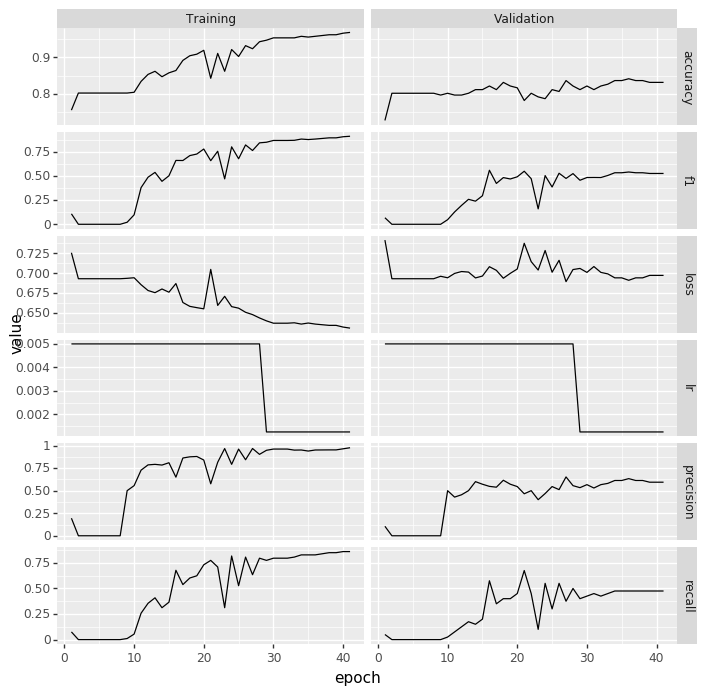

<ggplot: (8732979598898)>

In [224]:
%matplotlib inline
import plotnine as pn
(
    pn.ggplot(
        pd.DataFrame(history).set_index(['epoch', 'type'])
            .rename_axis('metric', axis='columns')
            .stack().rename('value').reset_index()
            .pipe(lambda df: df[df['metric'].isin(['f1', 'loss', 'accuracy', 'lr', 'precision', 'recall'])]),
        pn.aes(x='epoch', y='value')
    ) + 
    pn.geom_line() + 
    pn.facet_grid('metric ~ type', scales='free') + 
    pn.theme(figure_size=(8, 8))
)


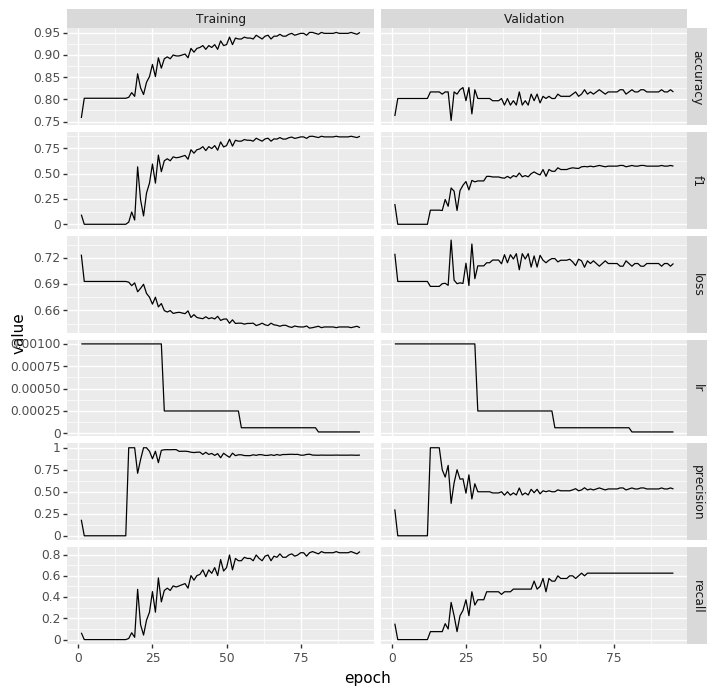

<ggplot: (8728203663834)>

In [61]:
%matplotlib inline
import plotnine as pn
(
pn.ggplot(
    pd.DataFrame(history).set_index(['epoch', 'type'])
        .rename_axis('metric', axis='columns')
        .stack().rename('value').reset_index()
        .pipe(lambda df: df[df['metric'].isin(['f1', 'loss', 'accuracy', 'lr', 'precision', 'recall'])]),
    pn.aes(x='epoch', y='value')
) + 
pn.geom_line() + 
pn.facet_grid('metric ~ type', scales='free') + 
pn.theme(figure_size=(8, 8))
)
